In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

ABSTRACT

The goal of this notebook is to conduct character recognition on the TMINST dataset (which has 94 characters). Training a classifier on the MNIST dataset is regarded as the hello world of image recognition. The character identification was done with a basic CNN network. Overall, the accuracy was found to be close to 90.79 percent, which is rather good for a simple 7 layer CNN.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import zipfile
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=pd.read_csv("../input/tmnist-alphabet-94-characters/94_character_TMNIST.csv")

In [ ]:
df

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274088,BalooChettan2-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274089,Prompt-ExtraBoldItalic,<,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274090,FiraSansCondensed-ThinItalic,z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274091,GothicA1-Bold,~,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df["labels"].nunique()

94

**Defining X and y from the dataset**

In [ ]:
X=df.iloc[:,2:].values
y=df.iloc[:,1].values

In [ ]:
X.shape, y.shape

((274093, 784), (274093,))

**Splitting the data in Training and Test Datasets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
X_train=X_train/255.
X_test=X_test/255

In [ ]:
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

Let's have a look at a few examples. Only grayscale photos are included in the MNIST collection.

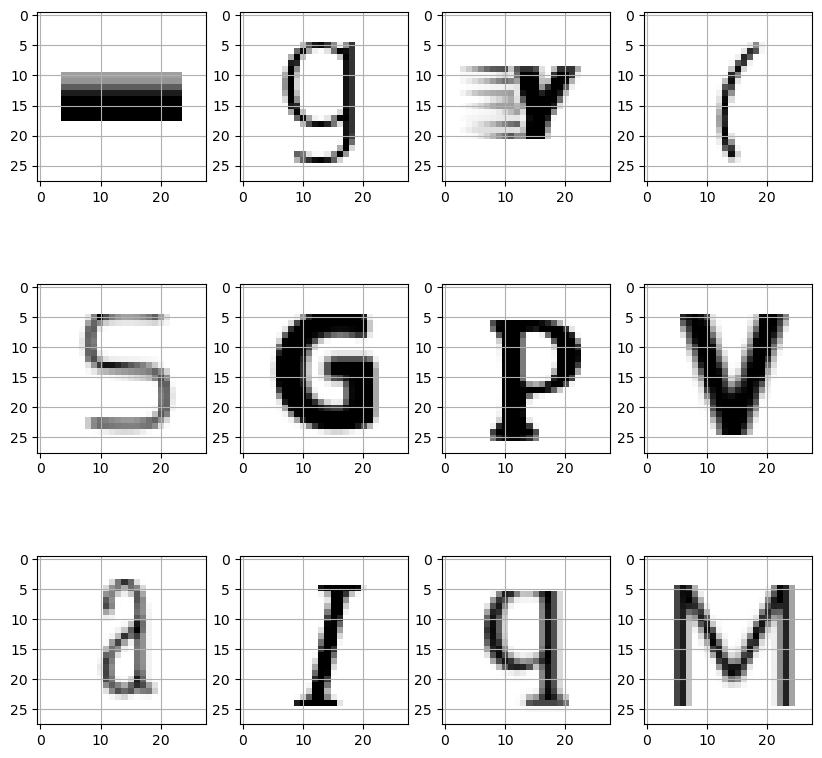

In [ ]:
# displaying the charecters of our dataset
random = shuffle(X_train[:500]) #Randomly shuffle
fig,ax = plt.subplots(3,4 , figsize = (10,10))
axes = ax.flatten()
for i in range(12):
    img = np.reshape(random[i], (28,28)) # reshaping it for displaying
    axes[i].imshow(img, cmap="Greys")
    img_final =np.reshape(img, (1,28,28,1)) # reshapng it for passing into model for prediction
    axes[i].grid()

In [ ]:
le=LabelEncoder()
y_train1=le.fit_transform(y_train)
y_test1=le.fit_transform(y_test)

70,000 pictures of handwritten digits are stored at MNIST, including 60,000 for training and 10,000 for testing. To reduce preparation and get started faster, the photos are grayscale, 28x28 pixels, and centered.

Keras is a user-friendly, fast prototyping, modular, and extensible high-level neural network API. It integrates with deep learning frameworks such as Tensorflow, Theano, and CNTK, allowing us to jump immediately into designing and training a neural network.

In [ ]:
model = keras.models.Sequential()
# tf.keras.layers.Dense(1024, input_shape=(X_train.shape[1],), activation='relu'),
model.add(keras.layers.Dense(300,input_shape=(X_train.shape[1],), activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(94, activation="softmax"))

2022-05-16 01:11:35.811100: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.

**Training the model for Neural Networks**

In [ ]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train1, epochs=20,validation_data=(X_test, y_test1),verbose=1)

Epoch 1/20


/opt/conda/lib/python3.7/site-packages/keras/backend.py:5586: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits, "Softmax", "sparse_categorical_crossentropy"


7709/7709 [==============================] - 44s 6ms/step - loss: 0.6142 - accuracy: 0.8242 - val_loss: 0.4255 - val_accuracy: 0.8710
Epoch 2/20
7709/7709 [==============================] - 43s 6ms/step - loss: 0.3892 - accuracy: 0.8748 - val_loss: 0.3904 - val_accuracy: 0.8764
Epoch 3/20
7709/7709 [==============================] - 43s 6ms/step - loss: 0.3342 - accuracy: 0.8887 - val_loss: 0.3655 - val_accuracy: 0.8844
Epoch 4/20
7709/7709 [==============================] - 42s 5ms/step - loss: 0.3002 - accuracy: 0.8984 - val_loss: 0.3544 - val_accuracy: 0.8898
Epoch 5/20
7709/7709 [==============================] - 44s 6ms/step - loss: 0.2757 - accuracy: 0.9060 - val_loss: 0.3380 - val_accuracy: 0.9001
Epoch 6/20
7709/7709 [==============================] - 43s 6ms/step - loss: 0.2558 - accuracy: 0.9118 - val_loss: 0.3607 - val_accuracy: 0.8949
Epoch 7/20
7709/7709 [==============================] - 43s 6ms/step - loss: 0.2416 - accuracy: 0.9160 - val_loss: 0.3525 - val_accuracy: 0.8

**The model gives an accuracy of 91.26%**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 94)                9494      
                                                                 
Total params: 275,094
Trainable params: 275,094
Non-trainable params: 0
_________________________________________________________________


**Conclusion**

As we can see, the wrong predictions are quite forgiveable since they're in some cases even hard to recognize for the human reader.

In summary we used Keras to train a neural network to recognize handwritten digits in under 20 seconds of training time - all that without having to spin up any compute instances, only using our browser.

References

https://www.kaggle.com/code/rushabhfegade/tmnist-glyphs

https://towardsdatascience.com/convolutional-neural-networks-explained-9cc5188c4939

**License**

This Notebook has been released under the Apache 2.0 open source license.